In [1]:
import numpy as np
import pandas as pd
 
import matplotlib.pyplot as plt
import seaborn as sns
 
%matplotlib inline

In [3]:
df = pd.read_csv('Data.csv')

#DATA CLEANING

df = df.drop(['S. No.', 'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'GADE', 'Timestamp', 'SWL1', 'SWL2', 'SWL3', 
               'SWL4', 'SWL5', 'Game', 'League', 'highestleague', 'streams', 'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 
               'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 
               'SPIN17', 'Narcissism', 'Reference', 'accept', 'SWL_T', 'SPIN_T', 'Birthplace', 'Residence',
               'Birthplace_ISO3', 'Residence_ISO3', 'earnings'], axis=1) #Birthplace/Residence cleaned up is ISO3

df.head()

,Platform,Hours,whyplay,Gender,Age,Work,Degree,Playstyle,GAD_T
0,"Console (PS, Xbox, ...)",15.0,having fun,Male,25,Unemployed / between jobs,Bachelor�(or equivalent),Singleplayer,1
1,PC,8.0,having fun,Male,41,Unemployed / between jobs,Bachelor�(or equivalent),Multiplayer - online - with strangers,8
2,PC,0.0,having fun,Female,32,Employed,Bachelor�(or equivalent),Singleplayer,8
3,PC,20.0,improving,Male,28,Employed,Bachelor�(or equivalent),Multiplayer - online - with online acquaintanc...,0
4,"Console (PS, Xbox, ...)",20.0,having fun,Male,19,Employed,High school diploma (or equivalent),Multiplayer - online - with strangers,14


In [4]:
df['GAD_T'] = df['GAD_T'].apply(lambda x: x/7) #averaging GAD Total score between 0 and 3
df['GAD_T'] = df['GAD_T'].apply(lambda x: 0 if x <= 1.0 else 1) #putting players into buckets of at-risk(0) or not at-risk(1)
df.rename(columns={'GAD_T': 'status'}, inplace=True) #renaming to more relevant name

df['Platform'] = df['Platform'].map({'Console (PS, Xbox, ...)': 1, 'PC': 2, 'Smartphone / Tablet': 3}) #Mapping devices to int

df['whyplay'] = df['whyplay'].map({'having fun': 1, 'improving': 2, 'relaxing': 3, 'winning': 4}) #Mapping motivation to int

df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 2, 'Other': 3}) # Mapping gender to int values

df['Work'] = df['Work'].map({'Unemployed / between jobs': 1, 'Employed': 2, 'Student at college / university': 3,
                             'Student at school': 4}) # Mapping work to int values

df['Degree'] = df['Degree'].map({'Bachelor�(or equivalent)' : 3, 'High school diploma (or equivalent)': 2,
       'Ph.D., Psy. D., MD (or equivalent)': 4, 'Master�(or equivalent)': 4, 'None': 1}) # Mapping educational degree to int values

df['Playstyle'] = df['Playstyle'].map({'Singleplayer': 1,
                                       'Multiplayer - online - with strangers': 2, 
                                       'Multiplayer - online - with online acquaintances or teammates': 3, 
                                       'Multiplayer - online - with real life friends': 4, 
                                       'Multiplayer - offline (people in the same room)': 5}) # Mapping playing environment to int values

df = df.dropna() #Dropping nan values

df.head()

,Platform,Hours,whyplay,Gender,Age,Work,Degree,Playstyle,status
0,1,15.0,1.0,1,25,1.0,3,1.0,0
1,2,8.0,1.0,1,41,1.0,3,2.0,1
2,2,0.0,1.0,2,32,2.0,3,1.0,1
3,2,20.0,2.0,1,28,2.0,3,3.0,0
4,1,20.0,1.0,1,19,2.0,2,2.0,1


Text(0, 0.5, 'Count of Respondents')

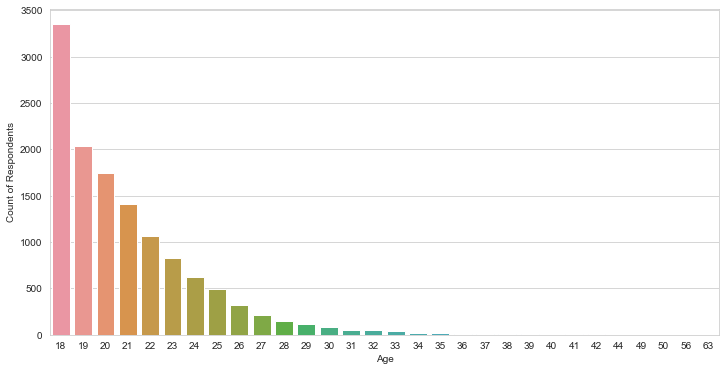

In [5]:
#EXPLORATORY DATA ANALYSIS

#Graph of age distribution in dataset:
tempdf = df['Age'].value_counts()
tempdf = pd.DataFrame(tempdf)
n = tempdf.sum(axis=0)
tempdf['Percent'] = tempdf['Age'].apply(lambda x: (x*100)/n)
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.countplot(x='Age', data=df)
plt.ylabel('Count of Respondents')

<AxesSubplot:>

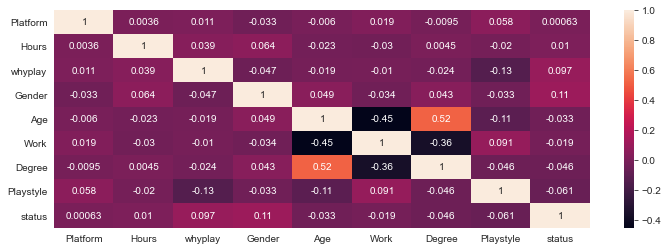

In [6]:
#Heatmap:
plt.figure(figsize=(12,4))
df_heatmap = df.corr()
sns.heatmap(data=df_heatmap, annot=True)



Text(0, 0.5, '% of At-Risk Players')

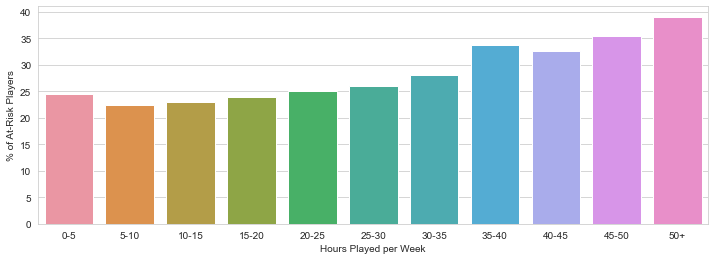

In [7]:
#Graph of Hours played vs -ve effects
# Cutting playing hours per week into bins (as there were 85 unique values)
bins = [-1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 100]
group_names = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50+']
df['Hour Bins'] = pd.cut(df['Hours'], bins, labels=group_names)
tempdf = df.groupby('Hour Bins')['status'].value_counts(normalize=True) # New temp df with containing only relevant values
tempdf = tempdf.mul(100).rename('Percent').reset_index() # Multiplying values by 100 as 'normalize' sets value between 0 & 1
tempdf = tempdf[tempdf['status'] == 1] # tempdf to include only players where status = 1 (ie those who have anxiety)
plt.figure(figsize=(12,4))
sns.barplot(x='Hour Bins', y='Percent', data=tempdf)
plt.xlabel('Hours Played per Week')
plt.ylabel('% of At-Risk Players')



Text(0, 0.5, '% of At-Risk Players')

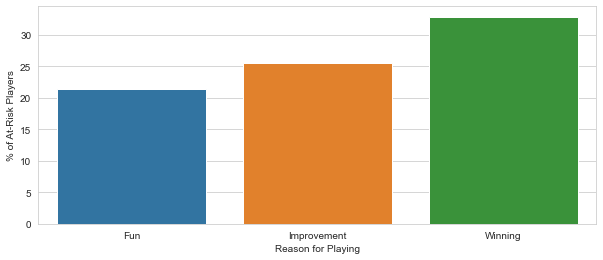

In [8]:
#Graph of WhyPlay vs -ve effects:
tempdf = df.groupby('whyplay')['status'].value_counts(normalize=True) # New temp df with containing only relevant values
tempdf = tempdf.mul(100).rename('Percent').reset_index() # Multiplying values by 100 as 'normalize' sets value between 0 & 1
tempdf = tempdf[tempdf['status'] == 1] # tempdf to include only players where status = 1 (ie those who have anxiety)
tempdf['whyplay'] = tempdf['whyplay'].map({1: 'Fun', 2: 'Improvement', 3: 'Relaxing', 4: 'Winning'}) # Unmapping for graph
tempdf = tempdf[tempdf['whyplay'] != 'Relaxing'] # removing 'Relaxing due to small sample size compared to others (see above cell)
plt.figure(figsize=(10,4))
sns.barplot(x='whyplay', y='Percent', data=tempdf)
plt.xlabel('Reason for Playing')
plt.ylabel('% of At-Risk Players')



Text(0, 0.5, '% of At-Risk Players')

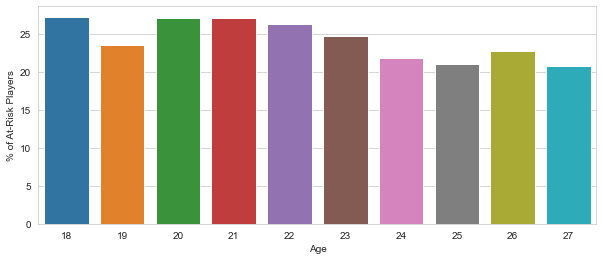

In [9]:
#Graph of Age vs -ve effects:
tempdf = df.groupby('Age')['status'].value_counts(normalize=True) # New temp df with containing only relevant values
tempdf = tempdf.mul(100).rename('Percent').reset_index() # Multiplying values by 100 as 'normalize' sets value between 0 & 1
tempdf = tempdf[tempdf['status'] == 1] # tempdf to include only players where status = 1 (ie those who have anxiety)
tempdf = tempdf[tempdf['Age'] <= 27] # to ensure sample size of min 200 respondents (see above cell)
plt.figure(figsize=(10,4))
sns.barplot(x='Age', y='Percent', data=tempdf)
plt.xlabel('Age')
plt.ylabel('% of At-Risk Players')

Text(0, 0.5, '% of At-Risk Players')

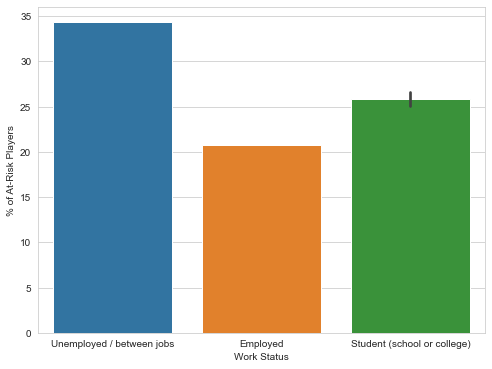

In [10]:
#Graph of Work vs -ve effects:
tempdf = df.groupby('Work')['status'].value_counts(normalize=True) # New temp df with containing only relevant values
tempdf = tempdf.mul(100).rename('Percent').reset_index() # Multiplying values by 100 as 'normalize' sets value between 0 & 1
tempdf = tempdf[tempdf['status'] == 1] # tempdf to include only players where status = 1 (ie those who have anxiety)
tempdf['Work'] = tempdf['Work'].map({1: 'Unemployed / between jobs', 2: 'Employed', 3: 'Student (school or college)',
                             4: 'Student (school or college)'}) # Unmapping for graph...some error on re-running
plt.figure(figsize=(8,6))
sns.barplot(x='Work', y='Percent', data=tempdf)
plt.xlabel('Work Status')
plt.ylabel('% of At-Risk Players')



Text(0, 0.5, '% of At-Risk Players')

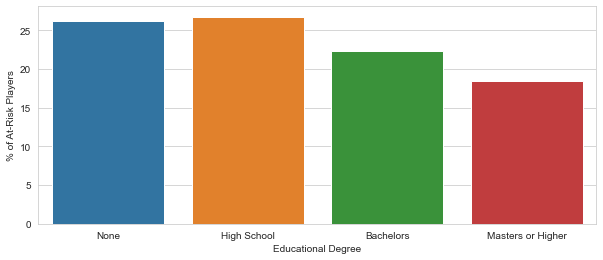

In [11]:
#Graph of Degree vs -ve effects:
tempdf = df.groupby('Degree')['status'].value_counts(normalize=True) # New temp df with containing only relevant values
tempdf = tempdf.mul(100).rename('Percent').reset_index() # Multiplying values by 100 as 'normalize' sets value between 0 & 1
tempdf = tempdf[tempdf['status'] == 1] # tempdf to include only players where status = 1 (ie those who have anxiety)
# Unmapping for graph // Combine 3 and 4 due to low sample of 4 - ToDo..
tempdf['Degree'] = tempdf['Degree'].map({3: 'Bachelors', 2: 'High School', 1: 'None', 4: 'Masters or Higher'}) 
plt.figure(figsize=(10,4))
sns.barplot(x='Degree', y='Percent', data=tempdf)
plt.xlabel('Educational Degree')
plt.ylabel('% of At-Risk Players')



Text(0, 0.5, '% of At-Risk Players')

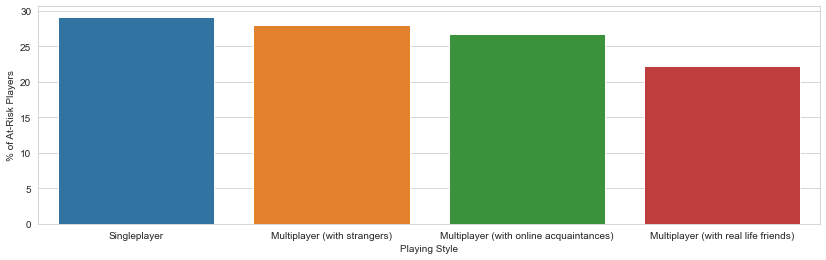

In [12]:
#Graph of Playstyle vs -ve effects:
tempdf = df.groupby('Playstyle')['status'].value_counts(normalize=True) # New temp df with containing only relevant values
tempdf = tempdf.mul(100).rename('Percent').reset_index() # Multiplying values by 100 as 'normalize' sets value between 0 & 1
tempdf = tempdf[tempdf['status'] == 1] # tempdf to include only players where status = 1 (ie those who have anxiety)
tempdf = tempdf[tempdf['Playstyle'] != 5.0] # Dropping offline multi-player due to low sample size
# Unmapping for graph:
tempdf['Playstyle'] = tempdf['Playstyle'].map({1: 'Singleplayer',
                                               2: 'Multiplayer (with strangers)', 
                                               3: 'Multiplayer (with online acquaintances)', 
                                               4: 'Multiplayer (with real life friends)'})
tempdf.head()
plt.figure(figsize=(14,4))
sns.barplot(x='Playstyle', y='Percent', data=tempdf)
plt.xlabel('Playing Style')
plt.ylabel('% of At-Risk Players')



In [19]:
#LOGISTIC REGRESSION MODEL

df = df.drop(['Hour Bins'], axis = 1) # this is a string and not required anymore, now that graph is done

#Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('status',axis=1),
                                                    df['status'], test_size=0.30,
                                                    random_state=101)



In [20]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('status',axis=1))
scaled_features = scaler.transform(df.drop('status',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()



,Platform,Hours,whyplay,Gender,Age,Work,Degree,Playstyle
0,-7.437293,-0.098209,-0.918204,-0.237203,1.225140,-2.071445,1.186756,-2.015990
1,0.111467,-0.195169,-0.918204,-0.237203,6.058715,-2.071445,1.186756,-1.007756
2,0.111467,-0.305982,-0.918204,3.741519,3.339829,-0.891383,1.186756,-2.015990
3,0.111467,-0.028951,0.033206,-0.237203,2.131435,-0.891383,1.186756,0.000478
4,-7.437293,-0.028951,-0.918204,-0.237203,-0.587451,-0.891383,-0.263367,-1.007756


In [21]:
#Training
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
#Evaluation
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))


              precision    recall  f1-score   support

           0       0.75      0.99      0.85      2829
           1       0.61      0.03      0.06       971

    accuracy                           0.75      3800
   macro avg       0.68      0.51      0.46      3800
weighted avg       0.71      0.75      0.65      3800



[[2810   19]
 [ 941   30]]


In [23]:
#Random Forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,rfc_pred))
print('\n')
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81      2829
           1       0.30      0.17      0.22       971

    accuracy                           0.69      3800
   macro avg       0.53      0.52      0.51      3800
weighted avg       0.64      0.69      0.66      3800



[[2452  377]
 [ 806  165]]
